# 201721510 김수현
# 8주차 텍스트마이닝 실습
# 01. featureset - bagofwords, tfidf, countvector


# Features of Text
**Text classification**: a way to categorize documents or pieces of text. By examining the word usage in a piece of text, classifiers can decide what class label to assign to it.
<br>A binary classifier decides between two labels, such as positive or negative.
<br>**Multi-label classifier** can assign one or more labels to a piece of text.
<br>Classification works by learning from **labeled feature sets**.
<br>A **feature set** is basically a key-value mapping of feature names to feature values. 
<br>In the case of text classification, the feature names are usually words, and the values are all True. 
<br>As the documents may have unknown words, and the number of possible words may be very large, words that don't occur in the text are omitted, instead of including them in a feature set with the value False.

## Bag of words feature extraction
Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. 
<br>The NLTK classifiers expect dict style feature sets, so we must therefore transform our text into a dict. 
<br>The **bag of words** model is the simplest method; it constructs a word presence feature set from all the words of an instance. 
<br>This method doesn't care about the order of the words, or how many times a word occurs, all that
matters is whether the word is present in a list of words.

In [160]:
# 주어진 문서(word tokenize된 결과)에 대해 feature set을 dictionary 형태로 구성해서 반환
def bag_of_words(words):
    return dict([(word, True) for word in words]) #있는 단어들에 대해 True로 표시, 없는 단어는 표시 안 함

In [161]:
bag_of_words(['the', 'quick', 'brown', 'fox'])

{'the': True, 'quick': True, 'brown': True, 'fox': True}

## NLTK Corpus
https://www.nltk.org/book/ch02.html


### movie_reviews
NLTK Corpus 중 movie review 수집 데이터로, 감성분석 결과(pos, neg)가 label로 붙어 있음<br>
Compiler: Pang, Lee<br>
Contents: 2k movie reviews with sentiment polarity classification

In [162]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\soo
[nltk_data]     hyun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [163]:
import nltk
nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

print('review count:', len(movie_reviews.fileids())) #영화 리뷰 문서의 id를 반환
print(movie_reviews.fileids()[:10]) #id를 10개까지만 출력
print(movie_reviews.categories()) # label, 즉 긍정인지 부정인지에 대한 분류
print('"neg" reviews:', len(movie_reviews.fileids(categories='neg'))) #label이 부정인 문서들의 id를 반환
print('"pos" reviews:', len(movie_reviews.fileids(categories='pos'))) #label이 긍정인 문서들의 id를 반환
fileid = movie_reviews.fileids()[0] #첫번째 문서의 id를 반환
print('id:', fileid)
print(movie_reviews.raw(fileid)[:500]) #첫번째 문서의 내용을 500자까지만 출력
print(movie_reviews.sents(fileid)[:2]) #첫번째 문서를 sentence tokenize한 결과 중 앞 두 문장
print(movie_reviews.words(fileid)[:10]) #첫번째 문서를 word tokenize한 결과 중 앞 열 단어

review count: 2000
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']
['neg', 'pos']
"neg" reviews: 1000
"pos" reviews: 1000
id: neg/cv000_29416.txt
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt
[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.']]
['

[nltk_data] Downloading package movie_reviews to C:\Users\soo
[nltk_data]     hyun\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


**bag of words model을 이용한 feature 추출 첫번째 방법**

label 별로 각 문서들에 대한 feature를 생성 - bag_of_words() 함수를 이용

collections(https://docs.python.org/2/library/collections.html) - High-performance container datatypes - 를 이용하여 feature set을 저장. 하나의 label(ex. 'neg')에 1,000개의 feature set을 할당해야 하므로 단순 dictionary가 아닌 container를 사용. 각 feature는 dictionary로 이루어져 있음

In [164]:
import collections

#feature 추출을 위한 함수로, 앞서 정의한 bag_of_words()를 사용
def label_feats_from_corpus(corp, feature_detector=bag_of_words): 
    label_feats = collections.defaultdict(list) # container 초기화
    for label in corp.categories(): #''neg', 'pos' 각 label에 대해
        for fileid in corp.fileids(categories=[label]): #각 label에 해당하는 문서들에 대해
            feats = feature_detector(corp.words(fileids=[fileid])) #주어진 문서를 bag_of_words feature로 변환
            label_feats[label].append(feats) #container에 feature 추가
    return label_feats

lfeats = label_feats_from_corpus(movie_reviews)
print(lfeats.keys())

dict_keys(['neg', 'pos'])


In [165]:
len(lfeats['neg'])

1000

In [166]:
", ".join(lfeats['neg'][0])

'plot, :, two, teen, couples, go, to, a, church, party, ,, drink, and, then, drive, ., they, get, into, an, accident, one, of, the, guys, dies, but, his, girlfriend, continues, see, him, in, her, life, has, nightmares, what, \', s, deal, ?, watch, movie, ", sorta, find, out, critique, mind, -, fuck, for, generation, that, touches, on, very, cool, idea, presents, it, bad, package, which, is, makes, this, review, even, harder, write, since, i, generally, applaud, films, attempt, break, mold, mess, with, your, head, such, (, lost, highway, &, memento, ), there, are, good, ways, making, all, types, these, folks, just, didn, t, snag, correctly, seem, have, taken, pretty, neat, concept, executed, terribly, so, problems, well, its, main, problem, simply, too, jumbled, starts, off, normal, downshifts, fantasy, world, you, as, audience, member, no, going, dreams, characters, coming, back, from, dead, others, who, look, like, strange, apparitions, disappearances, looooot, chase, scenes, tons, we

In [167]:
lfeats['neg'][0]

{'plot': True,
 ':': True,
 'two': True,
 'teen': True,
 'couples': True,
 'go': True,
 'to': True,
 'a': True,
 'church': True,
 'party': True,
 ',': True,
 'drink': True,
 'and': True,
 'then': True,
 'drive': True,
 '.': True,
 'they': True,
 'get': True,
 'into': True,
 'an': True,
 'accident': True,
 'one': True,
 'of': True,
 'the': True,
 'guys': True,
 'dies': True,
 'but': True,
 'his': True,
 'girlfriend': True,
 'continues': True,
 'see': True,
 'him': True,
 'in': True,
 'her': True,
 'life': True,
 'has': True,
 'nightmares': True,
 'what': True,
 "'": True,
 's': True,
 'deal': True,
 '?': True,
 'watch': True,
 'movie': True,
 '"': True,
 'sorta': True,
 'find': True,
 'out': True,
 'critique': True,
 'mind': True,
 '-': True,
 'fuck': True,
 'for': True,
 'generation': True,
 'that': True,
 'touches': True,
 'on': True,
 'very': True,
 'cool': True,
 'idea': True,
 'presents': True,
 'it': True,
 'bad': True,
 'package': True,
 'which': True,
 'is': True,
 'makes': True

**bag of words model을 이용한 feature 추출 두번째 방법**
1. 각 문서를 먼저 word list와 label의 list로 변환
2. feature 추출 대상이 되는 단어 집합 구성 - 이 때 전체 words들에 대한frequency data를 이용해 상위 n개의 단어만으로 feature 구성이 가능
3. 각 문서에 대해 feature 추출 대상 단어들을 대상으로 해당 단어가 문서에 있는 지의 여부를 dictionary로 생성
4. 생성된 feature와 label로 문서들에 대한 feature set을 구성

In [168]:
from nltk.corpus import movie_reviews
import random
# category 별로 fileid를 추출하고, 해당 fileid에 대해 문서의 word tokenize된 결과를 가져와서 
# documents 집합을 구성
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [169]:
#nltk FreqDist 함수를 이용하여 단어별로 빈도 수를 계산
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

In [170]:
for word in list(all_words)[:10]:
    print(word, all_words[word])

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822


In [171]:
sorted_features = sorted(all_words, key=all_words.get, reverse=True)
for word in sorted_features[:10]:
    print(word, all_words[word])
print(sorted_features[:10])

, 77717
the 76529
. 65876
a 38106
and 35576
of 34123
to 31937
' 30585
is 25195
in 21822
[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in']


In [172]:
word_features = sorted_features[:2000] #빈도가 높은 상위 2000개의 단어만 추출하여 features를 구성

print(word_features[:100])

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


In [173]:
#주어진 document를 feature로 변환하는 함수, word_features를 사용
def document_features(document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features:
        features[word] = (word in document_words) #2000개의 단어에 대해 True, False로 입력
    return features

In [174]:
#위에서 만든 documents 집합에 대해 feature set을 생성
featuresets = [(document_features(d, word_features), c) for (d,c) in documents]

In [175]:
print(len(featuresets[0][0])) #첫째 feature set의 첫째 element 즉 bag_of_words feature의 수 - 상위 2000개 단어
print(featuresets[0][1]) #첫째 feature set의 둘째 element 즉 label
print(featuresets[0][0]) # 첫째 feature set의 내용


2000
pos
{',': True, 'the': True, '.': True, 'a': True, 'and': True, 'of': True, 'to': True, "'": True, 'is': True, 'in': True, 's': True, '"': True, 'it': True, 'that': True, '-': True, ')': True, '(': True, 'as': True, 'with': True, 'for': True, 'his': True, 'this': True, 'film': True, 'i': True, 'he': True, 'but': True, 'on': True, 'are': True, 't': True, 'by': True, 'be': True, 'one': True, 'movie': True, 'an': True, 'who': True, 'not': False, 'you': True, 'from': True, 'at': True, 'was': True, 'have': False, 'they': True, 'has': True, 'her': False, 'all': True, '?': True, 'there': False, 'like': True, 'so': True, 'out': True, 'about': True, 'up': True, 'more': True, 'what': True, 'when': False, 'which': True, 'or': True, 'she': True, 'their': True, ':': True, 'some': True, 'just': False, 'can': True, 'if': True, 'we': False, 'him': True, 'into': True, 'even': True, 'only': True, 'than': True, 'no': True, 'good': True, 'time': True, 'most': True, 'its': True, 'will': True, 'story':

### BOW feature set을 이용한 분류 맛보기
https://www.nltk.org/book/ch06.html Section 1.3

![supervised-classification](supervised-classification.png)

NLTK Naive Bayes 분류기를 사용 http://www.nltk.org/howto/classify.html
주어진 문서의 label이 'neg'인지, 'pos'인지를 판단하는 분류기를 학습
상세한 내용은 Text Classification에서!

In [176]:
train_set, test_set = featuresets[100:], featuresets[:100] #train set과 test set으로 분리

classifier = nltk.NaiveBayesClassifier.train(train_set) # train set으로 학습
print(nltk.classify.accuracy(classifier, test_set)) # test set으로 분류기 성능을 평가
classifier.show_most_informative_features(5) #분류기에서 가장 중요한 영향을 미치는 단어 상위 5개

0.8
Most Informative Features
             outstanding = True              pos : neg    =     11.3 : 1.0
                   mulan = True              pos : neg    =      8.4 : 1.0
                  seagal = True              neg : pos    =      7.7 : 1.0
             wonderfully = True              pos : neg    =      7.4 : 1.0
                   damon = True              pos : neg    =      6.2 : 1.0


In [177]:
testfeat = bag_of_words(['the', 'actor', 'was', 'seagal']) 
print(classifier.classify(testfeat))
testfeat = bag_of_words(['the', 'story', 'was', 'outstanding'])
print(classifier.classify(testfeat))
negfeat = bag_of_words(['the', 'plot', 'was', 'ludicrous']) # 터무니없는
print(classifier.classify(negfeat))
posfeat = bag_of_words(['kate', 'winslet', 'is', 'accessible']) # 이해가 돼!
print(classifier.classify(posfeat))

neg
pos
neg
pos


## Count Vector with Scikit
http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

In [178]:
# data 준비, 입력이 raw text임
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

In [179]:
from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer()
cv = CountVectorizer(vocabulary=word_features) #빈도수 상위 2,000개의 단어만 사용하여 count vector 객체를 생성
print(cv) #객체 parameter들을 확인

CountVectorizer(vocabulary=[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is',
                            'in', 's', '"', 'it', 'that', '-', ')', '(', 'as',
                            'with', 'for', 'his', 'this', 'film', 'i', 'he',
                            'but', 'on', 'are', 't', 'by', ...])


In [180]:
print('reviews count:', len(reviews))

reviews count: 2000


In [181]:
X = cv.fit_transform(reviews) #review를 이용하여 count vector를 학습하고, 변환
print(cv.get_feature_names()[:100]) # count vector에 사용된 feature 이름을 반환

[',', 'the', '.', 'a', 'and', 'of', 'to', "'", 'is', 'in', 's', '"', 'it', 'that', '-', ')', '(', 'as', 'with', 'for', 'his', 'this', 'film', 'i', 'he', 'but', 'on', 'are', 't', 'by', 'be', 'one', 'movie', 'an', 'who', 'not', 'you', 'from', 'at', 'was', 'have', 'they', 'has', 'her', 'all', '?', 'there', 'like', 'so', 'out', 'about', 'up', 'more', 'what', 'when', 'which', 'or', 'she', 'their', ':', 'some', 'just', 'can', 'if', 'we', 'him', 'into', 'even', 'only', 'than', 'no', 'good', 'time', 'most', 'its', 'will', 'story', 'would', 'been', 'much', 'character', 'also', 'get', 'other', 'do', 'two', 'well', 'them', 'very', 'characters', ';', 'first', '--', 'after', 'see', '!', 'way', 'because', 'make', 'life']


In [182]:
print(X[0].toarray()[0, :100]) #변환된 결과의 첫째 feature set 중에서 앞 100개를 출력
print(max(X[0].toarray()[0])) #변환된 결과의 첫째 feature set 중에서 max 값

[ 0 38  0  0 20 16 16  0 12  8  0  0 25 13  0  0  0  1  5  4  1 10  6  0
  1 10  4 13  0  2  1  3  6  3  3  3  3  4  0  0  2  5  3  4  6  0 10  3
  3  3  2  2  2  4  1  4  2  0  0  0  0  4  0  0  4  1  5  3  1  0  1  2
  0  4  4  0  0  1  2  0  2  1  3  0  2  2  1  0  2  1  0  0  0  2  2  0
  3  2  5  1]
38


In [183]:
for word, count in zip(cv.get_feature_names()[:20], X[0].toarray()[0, :20]):
    print(word, ':', count)

, : 0
the : 38
. : 0
a : 0
and : 20
of : 16
to : 16
' : 0
is : 12
in : 8
s : 0
" : 0
it : 25
that : 13
- : 0
) : 0
( : 0
as : 1
with : 5
for : 4


## 문서 간 유사도 계산 및 가장 유사한 문서 검색

### **Cosine similarity**

(Wikipedia) a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them.

![cosine](cosine.png)

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

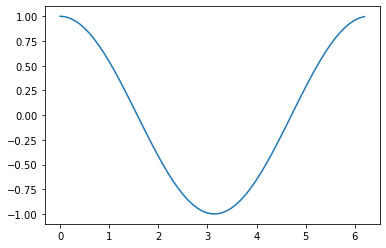

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,2*np.pi,0.1)   # start,stop,step
y = np.cos(x)
#print(x)
plt.plot(x, y)
plt.show()

In [185]:
from sklearn.metrics.pairwise import cosine_similarity

new_review = "first of all it's a plot heavy mess that has bad voice talents , badly written script and fantastic animation. they are small pokemon with a powerful punch and have great psychic abilities"
new_vec = cv.transform([new_review]) #문서를 count vector로 변환

sim_result = cosine_similarity(new_vec, X) #변환된 count vector와 기존 값들과의 similarity 계산

In [186]:
# https://docs.python.org/3/howto/sorting.html
print(sorted(sim_result[0], reverse=True)[:10])

[0.47404152357849716, 0.4354705693078365, 0.4179484687443539, 0.40669013197195214, 0.4042441311205991, 0.4031257527594671, 0.39316730570210306, 0.38744458895341755, 0.3852303002224743, 0.384468719848977]


In [187]:
import numpy as np
np.argmax(sim_result[0])

679

In [188]:
print(reviews[679])

 " pokemon 3 : the movie " has a lot of bad things in it . 
first of all it's a plot heavy mess that has bad voice talents , badly written script and fantastic animation . 
the first film came out the end of 1999 and was a huge hit grossing almost $90 million domestically . 
a sequel soon followed and even made $45 million . 
warner has released their third movie based on the immensely popular video game and tv series and its a waste of time and celluloid . 
this time ash ketchum and his friends are on their way to the johto battles ( which my little brother told me the new spinoff is " pokemon : the johto journeys " so go figure ) anyway he comes in contact with a young girl who's father has disappeared after trying to discover the unown . 
they are small pokemon with a powerful punch and have great psychic abilities . 
the unown bring together their psychic abilities and create entei a powerful legendary pokemon who barriers young molly's house and creates every wish she wants . 
now

In [189]:
(-sim_result[0]).argsort()[:10]

array([ 679,  176, 1152, 1575,  952,  470,  688, 1144,  103,  159],
      dtype=int64)

## TFIDF with Scikit
http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extractionalt 

![alt text](tfidf.png)
![alt text](idf.png)

기존에 만든 count vector로부터 TFIDF vector로 변환
Count vector를 거치지 않고 처음부터 TFIDF vector를 생성하는 것도 가능함 -> 나중에

In [190]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=True)
transformer

TfidfTransformer()

In [191]:
X_tfidf = transformer.fit_transform(X)
print(X_tfidf.shape)
print('max count score of the first vector:', max(X[0].toarray()[0]))
print('max tfidf score of the first vector:', max(X_tfidf[0].toarray()[0]))

(2000, 2000)
max count score of the first vector: 38
max tfidf score of the first vector: 0.3958279594831942


In [192]:
new_tfidf = transformer.transform(new_vec)
sim_result_tf = cosine_similarity(new_tfidf, X_tfidf)
np.argmax(sim_result_tf[0])

679

In [193]:
print(sorted(sim_result_tf[0], reverse=True)[:10])

[0.39386919931415737, 0.2158533727955655, 0.2055888622850777, 0.18940610744482467, 0.18862790397285573, 0.18841943811025338, 0.18329868368380425, 0.1810784645715442, 0.17853711709135542, 0.17620991687411133]


In [194]:
#count vector에 대한 유사도 상위 문서와 tfidf에 대한 유사도 상위 문서를 비교
print('Count vector:', (-sim_result[0]).argsort()[:10])
print('TFIDF vector:', (-sim_result_tf[0]).argsort()[:10])

Count vector: [ 679  176 1152 1575  952  470  688 1144  103  159]
TFIDF vector: [ 679  577 1209 1933  672 1280    3  913 1596 1163]


### **Jaccard Similarity**
https://en.wikipedia.org/wiki/Jaccard_index

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eaef5aa86949f49e7dc6b9c8c3dd8b233332c9e7)

In [51]:
!pip install scikit-learn
!pip install sklearn

In [ ]:
from sklearn.metrics import jaccard_similarity_score
tfidf_list = [679, 1280,  577, 1933, 1209, 1115, 1274, 913, 1456, 1796]
for i in tfidf_list:
    print(jaccard_similarity_score(new_vec.toarray()[0], X[i].toarray()[0]))

In [197]:
print(new_vec.toarray())

[[0 0 0 ... 0 0 0]]


### Dimension을 줄이는 방법: SVD
lasso가 feature selection이라면, SVD는 feature extraction

**Feature selection** (https://en.wikipedia.org/wiki/Feature_selection) 

In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for four reasons:

* simplification of models to make them easier to interpret by researchers/users,
* shorter training times,
* to avoid the curse of dimensionality,
* enhanced generalization by reducing overfitting (formally, reduction of variance)

Text mining에서는 단어의 수를 다양한 방법으로 줄일 수 있음

* 전처리 과정에서 의미 없는 단어 삭제
* stopwords 삭제
* 빈도가 낮은 단어 삭제
* 빈도가 높은 단어 삭제
* 결과에 영향을 미치지 않는 단어 삭제

**Feature extraction**: (https://en.wikipedia.org/wiki/Feature_extraction)

In machine learning, pattern recognition and in image processing, feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction.

* PCA(Principal component analysis)
* LSA(Latent semantic analysis)
* SVD(Singular-value decomposition)

In [198]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42) #압축할 component의 수 지정
svd.fit(X_tfidf)  
print(svd.explained_variance_ratio_)  #계산된 각 component가 설명하는 분산의 비율
print(svd.explained_variance_ratio_.sum())  #선택된 component들이 설명하는 분산의 합 -> 선택한 component의 수에 따라 달라짐
print(svd.singular_values_)  
newX = svd.transform(X_tfidf) #선택된 component를 이용하여 2,000개의 feature로부터 feature extract (dimension reduce)

[0.01514489 0.0166241  0.01317354 0.01030468 0.00756888 0.00725983
 0.00659312 0.00580567 0.00550706 0.00504246 0.00483872 0.00470389
 0.00453713 0.0043536  0.00431135 0.00415999 0.004104   0.00402205
 0.00382987 0.00380754 0.0036883  0.00367408 0.00363124 0.00352173
 0.00347459 0.00339472 0.00335051 0.00325916 0.00323815 0.00315384
 0.00314674 0.00304913 0.00300347 0.00299865 0.00295145 0.00292693
 0.00289485 0.00287923 0.00282802 0.00280223 0.00277773 0.00274264
 0.00271311 0.00268979 0.00265569 0.00264501 0.00259901 0.00257714
 0.0025622  0.00254445 0.00249797 0.00245484 0.00243712 0.00241656
 0.00238654 0.00235366 0.00234395 0.00233282 0.00229758 0.002295
 0.00227465 0.00226673 0.00224546 0.00223066 0.00221365 0.00220156
 0.00219036 0.00218628 0.00216656 0.00216035 0.00215562 0.00211927
 0.00211044 0.00207907 0.00207117 0.00205964 0.00205848 0.00203116
 0.00202441 0.00199946 0.00199753 0.00199207 0.00197294 0.0019617
 0.0019585  0.00193714 0.00191767 0.00191458 0.00189811 0.0018677

In [199]:
print(svd.components_.shape)
print(newX.shape)

(100, 2000)
(2000, 100)


In [200]:
svd.components_[0]

array([-0.        ,  0.63007194,  0.        , ...,  0.00265981,
        0.00257053,  0.00246303])

# 02. 영문문서 분류
## Text Classification
텍스트 문서의 다양한 분류방법에 대해 학습

### 데이터 준비 (복습)
이전에 사용한 영화리뷰 데이터를 이용해서 주어진 리뷰 내용에 대해 positive와 negative를 분류하는 분류기를 학습하고자 함

In [56]:
from nltk.corpus import movie_reviews
fileids = movie_reviews.fileids() #movie review data에서 file id를 가져옴
reviews = [movie_reviews.raw(fileid) for fileid in fileids] #file id를 이용해 raw text file을 가져옴
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids] 
#file id를 이용해 label로 사용할 category 즉 positive와 negative 정보를 순서대로 가져옴

print('Reviews count:', len(reviews))
print('Length of the first review:', len(reviews[0]))
print('Labels:', set(categories))

Reviews count: 2000
Length of the first review: 4043
Labels: {'pos', 'neg'}


### train set과 test set의 분리

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

적절한 비율로 train set과 test set을 분리하여 저장<br>
train set은 학습에 사용되고, test set은 검증에 사용<br>
default로 shuffle을 함: train set과 test set이 고르게 분포되도록 하기 위함

In [57]:
from sklearn.model_selection import train_test_split #sklearn에서 제공하는 split 함수를 사용
X_train, X_test, y_train, y_test = train_test_split(reviews, categories, test_size=0.2, random_state=10)
# sklearn의 train_test_split 함수는 먼저 data set을 shuffle하고 주어진 비율에 따라 train set과 test set을 나눠 줌
# 위에서는 reviews를 X_train과 X_test로 8:2의 비율로 나누고, categories를 y_train과 y_test로 나눔
# 이 때 X와 y의 순서는 동일하게 유지해서 각 입력값과 label이 정확하게 match되도록 함
# random_state는 shuffle에서의 seed 값으로, 지정한 경우 항상 동일한 결과로 shuffle이 됨

print('Train set count: ', len(X_train))
print('Test set count: ', len(X_test))

Train set count:  1600
Test set count:  400


### TFIDF 변환

http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
    
CountVectorizer로 Count Vector를 생성하고 TFIDF로 변환하는 대신, text로부터 직접 생성

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
#sklearn에서 제공하는 TfidfVectorizer를 이용
tfidf = TfidfVectorizer().fit(X_train) # X_train을 이용하여 vectorizer를 학습
tfidf #vectorize에서 사용한 매개변수 값들을 확인 -> 현재는 모두 default 값을 사용, 향후 tokenizer, max_features 등을 지정할 수 있음
# 상세한 매개변수 내용은 위 링크를 참조

TfidfVectorizer()

In [59]:
X_train_tfidf = tfidf.transform(X_train) #학습된 vectorizer를 이용하여 train set을 변환
X_train_tfidf.shape # 1600 (review 수) x 36310 (전체 corpus에서 사용된 단어의 수) 크기로 vector set이 생성됨
# matrix 안의 값은 해당 tfidf score임

(1600, 36310)

In [60]:
tfidf = TfidfVectorizer(max_features=2000).fit(X_train) #사용된 단어의 수가 너무 많은 경우, max_feature를 제한하여 학습이 가능
tfidf #max_factures 값이 사용된 것을 볼 수 있음

TfidfVectorizer(max_features=2000)

In [61]:
X_train_tfidf = tfidf.transform(X_train) # train set을 변환
print('Train set dimension:', X_train_tfidf.shape) # 36310 대신 2000이 된 것을 확인
X_test_tfidf = tfidf.transform(X_test) # test set을 변환
print('Test set dimension:', X_test_tfidf.shape)

Train set dimension: (1600, 2000)
Test set dimension: (400, 2000)


## Naive Bayse Classifier (Scikit)

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [62]:
#나이브 베이즈는 word count를 사용하므로 tfdif가 아닌 count vectorizer를 사용하여 학습 및 변환
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2000).fit(X_train) #tfidf와 동일하게 max_feature를 제한하여 학습
X_train_cv = cv.transform(X_train) # train set을 변환
print('Train set dimension:', X_train_cv.shape) # 36310 대신 2000이 된 것을 확인
X_test_cv = cv.transform(X_test) # test set을 변환
print('Test set dimension:', X_test_cv.shape)

Train set dimension: (1600, 2000)
Test set dimension: (400, 2000)


In [63]:
from sklearn.naive_bayes import MultinomialNB #sklearn이 제공하는 MultinomialNB 를 사용
NB_clf = MultinomialNB() # 분류기 선언

NB_clf.fit(X_train_cv, y_train) #train set을 이용하여 분류기(classifier)를 학습
#NB_clf.fit(X_train_tfidf, y_train) #tfidf 값을 사용할 수도 있으나, NB 이론에 맞지 않음

MultinomialNB()

In [64]:
print('Train set score: {:.3f}'.format(NB_clf.score(X_train_cv, y_train))) #train set에 대한 예측정확도를 확인
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_cv, y_test))) #test set에 대한 예측정확도를 확인
#실제로 필요한 것은 test set에 대한 예측정확도이나, 과적합 (overfitting)의 문제가 있는지를 보기 위해 train set에 대한 예측정확도를 같이 확인
#print('Train set score: {:.3f}'.format(NB_clf.score(X_train_tfidf, y_train)))
#print('Test set score: {:.3f}'.format(NB_clf.score(X_test_tfidf, y_test)))

Train set score: 0.864
Test set score: 0.775


In [65]:
#여러 문장에 대해 count vectorier로 변환 후 학습된 분류기로 결과를 예측
print(NB_clf.predict(cv.transform(['the story was unimaginative', 'the plot was ludicrous', 'kate winslet is accessible'])))

#위 첫째 문장에서 story를 actor로 바꿔서 예측
print(NB_clf.predict(cv.transform(['the actor was unimaginative'])))
#동일한 형용사라도 대상에 따라 결과가 바뀔 수 있음

['pos' 'neg' 'pos']
['neg']


## Logistic Regression (Scikit)

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

예측하고자 하는 값 혹은 label이 연속적인 값이 아니고 분류(class)일 때 사용하는 regression 방법<br>
분류는 binary인 경우와 multi-class인 경우가 있음<br>
지금은 positive와 negative 두 class 중에서 선택하므로 binary classification 문제임

In [66]:
from sklearn.linear_model import LogisticRegression #sklearn이 제공하는 logistic regression을 사용

#count vector에 대해 regression을 해서 NB와 비교
LR_clf_cv = LogisticRegression() #분류기 선언
LR_clf_cv.fit(X_train_cv, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(LR_clf_cv.score(X_train_cv, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(LR_clf_cv.score(X_test_cv, y_test))) # test data에 대한 예측정확도
# count vector를 이용한 regression 결과가 tfidf보다 더 좋게 나옴
# 보통은 tfidf가 더 좋은 결과를 보이는데, 이와 같이 상황에 따라 다른 결과가 나오기도 함
# 지금은 train data의 수가 1,600개인데 비해, 추정해야 하는 parameter의 수가 2,000개로 sample 수가 학습에 부족한 상황, 
# 따라서 예상 못한 다양한 결과가 나올 수 있음
# 좀더 data가 많은 상황에서의 test가 필요

Train set score: 1.000
Test set score: 0.825


C:\Users\soo hyun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
#tfidf vector를 이용해서 분류기 학습
LR_clf = LogisticRegression() #분류기 선언
LR_clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(LR_clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(LR_clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도
# NB에 비해 더 좋은 결과가 나오는 것을 확인

Train set score: 0.917
Test set score: 0.820


In [68]:
# NB 분류기에서 사용했던 예제로 결과 확인, 실제로 결과가 더 나아졌음을 확인할 수 있음
LR_clf.predict(tfidf.transform(['the story was unimaginative', 'the plot was ludicrous', 'kate winslet is accessible']))

array(['neg', 'neg', 'pos'], dtype='<U3')

### Ridge regression
https://brilliant.org/wiki/ridge-regression/
Tikhonov Regularization, colloquially known as **ridge regression**, is the most commonly used regression algorithm to approximate an answer for an equation with no unique solution. This type of problem is very common in machine learning tasks, where the "best" solution must be chosen using limited data.

https://en.wikipedia.org/wiki/Tikhonov_regularization
the most commonly used method of **regularization** of ill-posed problems. In statistics, the method is known as **ridge regression**, in machine learning it is known as **weight decay**, and with multiple independent discoveries.
![](https://ds055uzetaobb.cloudfront.net/image_optimizer/37ea8b78480bb520a3e30b7113689f7b77cecc2d.png)
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Ridge regression은 과적합을 방지하기 위해 사용됨<br>
과적합은 분류기가 training data에 지나치게 fitting되어 실제 상황 혹은 test data에서는 좋은 성능이 나타나지 않는 상황을 말함<br>
위 그림에서 파란색의 선은 보다 간단한 초록색의 선으로 주어진 데이터를 설명할 수 있음에도 불구하고, 훨씬 복잡한 곡선으로 fitting이 되어 있으며, 이로 인해 training data에 대한 예측정확도는 높으나 test data에 대해서는 예측정확도가 떨어짐<br>
이와 같은 현상을 방지하기 위해서는 곡선이 지나치게 복잡해지지 않도록 parameter를 억제하면 됨<br>
Rigde regression은 parameter에 대해 제약을 줌으로써 학습과정에서 parameter가 과도하게 변하지 않도록 함<br>

In [69]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train_tfidf, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))
# 일반적으로 ridge regression을 쓰면 쓰지 않은 경우보다 train data에 대한 예측정확도는 떨어지고 test data는 올라가게 됨
# 여기서는 train set에 대한 예측정확도가 같이 상승하는 진귀한 경우가 발생

Train set score: 0.974
Test set score: 0.838


### Lasso regression for feature selection
https://en.wikipedia.org/wiki/Lasso_(statistics)
In statistics and machine learning, **lasso** (least absolute shrinkage and selection operator) (also Lasso or LASSO) is a regression analysis method that performs both **variable selection** and **regularization** in order to enhance the prediction accuracy and **interpretability** of the statistical model it produces. 

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

Lasso regression은 ridge regression과 비슷하게 parameter에 제약을 주지만, 0에 가까운 parameter를 완전히 0으로 바꿔서 결과적으로 feature를 선택하게 된다는 차이가 있음

In [70]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear') # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train_tfidf, y_train) # train data로 학습
print('Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))
print('Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1]) 
# parameter 혹은 coefficient 중에서 0이 아닌 것들의 개수를 출력
# 2000개 중에서 78개만 선택된 것을 볼 수 있음
# 예측률은 rigde나 일반 logistic에 비해 떨어지지만, 실제로 영향을 미치는 단어들이 어떤 것들인지 확인할 수 있다는 장점이 있음

Train set score: 0.804
Test set score: 0.770
Used features count: 78 out of 2000


In [71]:
print(len(tfidf.vocabulary_)) # tfidf에 사용된 단어의 수
tfidf_voca = tfidf.get_feature_names() # tfidf에서 단어이름을 가져옴
tfidf_voca[:10] # 앞 10개를 출력

2000


['000', '10', '100', '13', '15', '1995', '1996', '1997', '1998', '1999']

In [72]:
print((lasso_clf.coef_ != 0)[0].tolist()[:100]) 
# lasso에 사용된 단어들 중 coefficient의 사용여부를 리스트로 변환하여 앞부터 100개를 출력해 봄

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False]


In [73]:
selected_features = []
for i, sign in enumerate((lasso_clf.coef_ != 0)[0].tolist()):
    if sign: selected_features.append(tfidf_voca[i]) #사용여부가 True인 단어들만 selected_features에 저장

In [74]:
print(selected_features) #78개의 선택된 단어들을 출력 - 즉 positive, negative에 결정적 영향을 미치는 단어들
len(selected_features)

['aliens', 'also', 'and', 'any', 'as', 'attempt', 'awful', 'bad', 'batman', 'boring', 'cameron', 'carpenter', 'could', 'definitely', 'director', 'dull', 'even', 'excellent', 'family', 'great', 'hanks', 'harry', 'have', 'he', 'her', 'here', 'his', 'in', 'is', 'jackie', 'julie', 'lame', 'least', 'lebowski', 'life', 'looks', 'many', 'matrix', 'mess', 'most', 'movie', 'mulan', 'no', 'nothing', 'off', 'on', 'only', 'perfect', 'perfectly', 'plot', 'political', 'poor', 'quite', 'reason', 'ridiculous', 'scream', 'script', 'seagal', 'see', 'seen', 'shrek', 'so', 'stupid', 'supposed', 'the', 'then', 'there', 'this', 'to', 'truman', 'unfortunately', 'very', 'war', 'waste', 'well', 'west', 'why', 'worst']


78

In [75]:
tfidf_voca[(lasso_clf.coef_ != 0)[0].tolist().index(True)]

'aliens'

In [76]:
print([tfidf_voca[i] for i, j in enumerate((lasso_clf.coef_ != 0)[0].tolist()) if j]) #선택된 단어들을 출력하는 또다른 방법

['aliens', 'also', 'and', 'any', 'as', 'attempt', 'awful', 'bad', 'batman', 'boring', 'cameron', 'carpenter', 'could', 'definitely', 'director', 'dull', 'even', 'excellent', 'family', 'great', 'hanks', 'harry', 'have', 'he', 'her', 'here', 'his', 'in', 'is', 'jackie', 'julie', 'lame', 'least', 'lebowski', 'life', 'looks', 'many', 'matrix', 'mess', 'most', 'movie', 'mulan', 'no', 'nothing', 'off', 'on', 'only', 'perfect', 'perfectly', 'plot', 'political', 'poor', 'quite', 'reason', 'ridiculous', 'scream', 'script', 'seagal', 'see', 'seen', 'shrek', 'so', 'stupid', 'supposed', 'the', 'then', 'there', 'this', 'to', 'truman', 'unfortunately', 'very', 'war', 'waste', 'well', 'west', 'why', 'worst']


### Dimension을 줄이는 또다른 방법: SVD
lasso가 feature selection이라면, SVD는 feature extraction

**Feature selection** (https://en.wikipedia.org/wiki/Feature_selection) 

In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for four reasons:

* simplification of models to make them easier to interpret by researchers/users,
* shorter training times,
* to avoid the curse of dimensionality,
* enhanced generalization by reducing overfitting (formally, reduction of variance)

Text mining에서는 단어의 수를 다양한 방법으로 줄일 수 있음

* 전처리 과정에서 의미 없는 단어 삭제
* stopwords 삭제
* 빈도가 낮은 단어 삭제
* 빈도가 높은 단어 삭제
* 결과에 영향을 미치지 않는 단어 삭제

**Feature extraction**: (https://en.wikipedia.org/wiki/Feature_extraction)

In machine learning, pattern recognition and in image processing, feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction.

* PCA(Principal component analysis)
* LSA(Latent semantic analysis)
* SVD(Singular-value decomposition)

### PCA(Principal component analysis)

https://en.wikipedia.org/wiki/Principal_component_analysis

**Principal component analysis (PCA)** is a statistical procedure that uses an *orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables* called principal components. If there are {\displaystyle n} n observations with {\displaystyle p} p variables, then the number of distinct principal components is {\displaystyle \min(n-1,p)} {\displaystyle \min(n-1,p)}. This transformation is defined in such a way that the first principal component has the *largest possible variance* (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

**PCA(주성분분석)**: 데이터의 분산을 최대한 보존하는 새로운 축을 찾아 변환함으로써 차원을 축소

https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

![](g1.png)
![](pca1.gif)
![](pca2.gif)

### LSA(Latent Semantic Analysis)

**Latent semantic analysis (LSA)** is a technique in natural language processing, in particular distributional semantics, of analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. LSA assumes that *words that are close in meaning will occur in similar pieces of text* (the distributional hypothesis). A matrix containing word counts per paragraph (rows represent unique words and columns represent each paragraph) is constructed from a large piece of text and a mathematical technique called **singular value decomposition (SVD)** is used to reduce the number of rows while preserving the similarity structure among columns. Words are then compared by taking the cosine of the angle between the two vectors (or the dot product between the normalizations of the two vectors) formed by any two rows. Values close to 1 represent very similar words while values close to 0 represent very dissimilar words.

**SVD(특이값 분해)** https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/
"*truncated SVD*는 Σ 행렬의 대각원소(특이값) 가운데 상위 t개만 골라낸 형태. 이렇게 하면 행렬 A를 원복할 수 없게 되지만, 데이터 정보를 상당히 압축했음에도 행렬 A를 근사할 수 있음." **잠재의미분석(LSA)** 은 바로 이 방법을 사용"

![](tSVD.png)

동영상 확인: https://en.wikipedia.org/wiki/Latent_semantic_analysis

### Scikit-learn LSA
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
<br>
**Dimensionality reduction using truncated SVD (aka LSA).**

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.

In [77]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42) #압축할 component의 수 지정
svd.fit(X_train_tfidf)  # train data로 학습 -> unsupervised이므로 y가 필요 없음
print(svd.explained_variance_ratio_)  #계산된 각 component가 설명하는 분산의 비율
print(svd.explained_variance_ratio_.sum())  #선택된 component들이 설명하는 분산의 합 -> 선택한 component의 수에 따라 달라짐
# 현재 결과에서는 100개의 선택된 component가 전체 분산의 34% 정도를 설명하고 있음
print(svd.singular_values_) #위 그림에서 오른쪽 가운데 대각행렬의 값
print(svd.components_.shape) # 위 그림에서 가장 오른쪽 행렬의 값

[0.01525261 0.01669138 0.0133583  0.01042773 0.00741403 0.00730082
 0.00677966 0.00583257 0.00555167 0.00520324 0.00493018 0.00489498
 0.00458197 0.0044574  0.00432849 0.00421975 0.0041921  0.00413251
 0.00403416 0.00398954 0.00388074 0.00379435 0.00377392 0.00370049
 0.00361687 0.00358558 0.00350955 0.00340951 0.0033149  0.00327589
 0.00321078 0.00319169 0.00315556 0.00311055 0.00304756 0.00302892
 0.00300949 0.00297231 0.00293611 0.00292412 0.00290208 0.00287548
 0.0028342  0.00280742 0.00276097 0.00274277 0.00270645 0.00268513
 0.00267427 0.00265801 0.00258256 0.00257419 0.00256683 0.00255658
 0.00251155 0.00250159 0.00248046 0.00247207 0.00245957 0.00245289
 0.00241614 0.0023879  0.00236025 0.00234094 0.00233893 0.00231345
 0.00229516 0.0022807  0.00227705 0.00224271 0.00222958 0.00222203
 0.00220312 0.00219438 0.00218776 0.0021722  0.00215608 0.00215051
 0.00213564 0.00212784 0.00211271 0.00208695 0.00207613 0.00206077
 0.00204613 0.00203201 0.00200931 0.00199865 0.00199714 0.0019

In [78]:
X_train_svd = svd.transform(X_train_tfidf) #선택된 component를 이용하여 2,000개의 feature로부터 feature extract (dimension reduce)
print(X_train_tfidf.shape) #축소하기 전의 차원
print(X_train_svd.shape) #축소된 후의 차원, 2000 -> 100개로 줄어 있음

(1600, 2000)
(1600, 100)


#### LSA를 이용한 Logistic Regression

In [79]:
X_test_svd = svd.transform(X_test_tfidf)

from sklearn.linear_model import LogisticRegression
SVD_clf = LogisticRegression()
SVD_clf.fit(X_train_svd, y_train) #축소된 값으로 학습
print('Train set score: {:.3f}'.format(SVD_clf.score(X_train_svd, y_train)))
print('Test set score: {:.3f}'.format(SVD_clf.score(X_test_svd, y_test)))
# NB, Lasso보다 좋지만 Ridge, 일반보다는 나쁜 값
# 상황에 따라 달라질 수 있음

Train set score: 0.838
Test set score: 0.790


# 03. 한글문서 분류
다음무비(http://movie.daum.net)로부터 crawl한 영화리뷰를 이용하여 분류 연습<br>
영화리뷰와 영화의 제목을 학습해서 주어진 리뷰내용으로 어떤 영화에 대한 리뷰인지를 예측하고자 함
### data file 내용
'신과함께', '코코', '라라랜드', '인피니티 워', '곤지암' 다섯개의 영화에 대해 총 1827개의 리뷰를 수집
csv 파일 안에 리뷰내용, 평점, 영화이름 의 순으로 저장되어 있음

In [202]:
import csv

text = []
y = []
with open('movie_data(3).csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        #print(row)
        if row: #그 줄에 내용이 있는 경우에만
            text.append(row[0]) #영화 리뷰를 text 리스트에 추가
            y.append(row[2]) #영화이름을 text 리스트에 추가

In [203]:
print('Num of samples: {}'.format(len(text)))
print('Movie titles of reivews: {}'.format(set(y)))

Num of samples: 1827
Movie titles of reivews: {'인피니티 워', '라라랜드', '곤지암', '신과함께', '코코'}


In [204]:
from sklearn.model_selection import train_test_split

# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(text, y, random_state=0)
# 비율을 지정하지 않으면 75:25로 분할됨

In [205]:
len(X_train) #1827의 0.75

1370

In [206]:
from konlpy.tag import Okt #konlpy에서 Twitter 형태소 분석기를 import
#from konlpy.tag import Twitter #konlpy에서 Twitter 형태소 분석기를 import
twitter_tag = Okt()
#twitter_tag = Twitter()

In [207]:
print(twitter_tag.morphs(X_train[1])) #둘째 리뷰에 대해 형태소 단위로 tokenize

['혹시', '나', '하고', '봤는데', '역시', '나다', ';;', '편집', '과', '사운드', '로', '주는', '작은', '공포', '영화', "'", '푸시', "'", '에서', '인상', '깊게', '봤던걸', '여기', '서', '또', '보네', ';;']


In [208]:
twitter_tag.nouns(X_train[1]) #둘째 리뷰에서 명사만 추출

['혹시', '역시', '편집', '사운드', '공포', '영화', '푸시', '인상', '여기', '또']

In [209]:
def twit_tokenizer(text): # Twitter 형태소 분석기의 명사추출함수를 tokenizer 함수로 사용
    return twitter_tag.nouns(text)

In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

#tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=3, max_df=0.90, max_features=1000, use_idf=True, sublinear_tf=True)
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=2) #Twitter 형태소분석기에서 명사만 추출하는 함수를 tokenizer로 이용
# twit_tokenizer 대신 twitter_tag.nouns를 직접 써도 됨
# 하나의 문서에서만 출현한 단어는 쓸모가 없으므로 제외, 즉 최소 document frequency를 2로 설정

X_train_tfidf = tfidf.fit_transform(X_train) # train data 변환 -> tfidf vector
X_test_tfidf = tfidf.transform(X_test) # test data 변환 -> tfidf vector

clf = LogisticRegression() # logistic regression 분류기 선언
clf.fit(X_train_tfidf, y_train) # 분류기 학습
print('Train score', clf.score(X_train_tfidf, y_train)) # train data 예측정확도
print('Test score', clf.score(X_test_tfidf, y_test)) # test data 예측정확도
print(X_train_tfidf.shape) # 총 1156개의 명사로 이루어짐

Train score 0.8364963503649635
Test score 0.6717724288840262
(1370, 1156)


In [211]:
X_test[:10] #test data에서 앞 10개를 출력

['졸잼 최고',
 '내용, 음악 , 연기력  무엇하나 빠지는것이 없네요 특히 음악은 계속 찾아 듣게되요^^',
 '아맥2D로 느즈막히 관람.... 히어로가 많이나오지만, 이걸 꽤나 잘 버무려놓음. 뻔한스토리의 틀을 벗어나려 노력한점은 높은점수를 줄만함.... 블럭버스터액션, 영상미는 말이필요없음...... 후속편 기대됨!',
 '후반부터 쫄렸다.',
 '진짜. 솔직히 한국 공포영화중에 이렇게 소재별로인건 정말 오랜만인듯; 지들끼리 소리지르고 정신없이 우왕자왕 심지어 무섭지도않어 효과음만크고 진짜최악임ㅉㅉ',
 '소문난 잔치에 먹을거 없음..ㅜㅜ',
 'good!',
 '아 점수를 줄 수가 없네  화면은 왜그리도 흔들어 데는지........ 재미도 없고 가볍기만하고 .... 최악의 재미없는 배멀미 영화',
 '영화 보면서 펑펑물었네요~ 부모님 사랑에 대해 다시한번 생각하게 했던 영화네요^ ^',
 '슬픈 스토리지만 삶을 돌아보게 하는 영화다. 죄를 지은자는 그 벌을 고스란히 받으리라. 사회 각종범죄자들 뉘우치길 바란다.']

In [212]:
clf.predict(X_test_tfidf[:10]) # test data의 앞 10개에 대한 예측내용

array(['인피니티 워', '라라랜드', '인피니티 워', '곤지암', '곤지암', '인피니티 워', '인피니티 워',
       '신과함께', '코코', '신과함께'], dtype='<U6')

In [213]:
print(y_test[:10]) # test data 앞 10개의 실제 영화제목

['인피니티 워', '라라랜드', '인피니티 워', '곤지암', '곤지암', '인피니티 워', '인피니티 워', '곤지암', '신과함께', '신과함께']


### 성능을 개선하기 위한 노력

In [214]:
# morphs()는 명사 외에도 모든 형태소를 포함
print(twitter_tag.morphs(X_train[1]))

['혹시', '나', '하고', '봤는데', '역시', '나다', ';;', '편집', '과', '사운드', '로', '주는', '작은', '공포', '영화', "'", '푸시', "'", '에서', '인상', '깊게', '봤던걸', '여기', '서', '또', '보네', ';;']


In [215]:
tfidf = TfidfVectorizer(tokenizer=twitter_tag.morphs, min_df=2) # 명사 대신 모든 형태소를 사용
#tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=3, max_df=0.90, max_features=1000, use_idf=True, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)
print('Train score', clf.score(X_train_tfidf, y_train))
print('Test score', clf.score(X_test_tfidf, y_test))
print(X_train_tfidf.shape)
#명사만 사용한 것에 비해 train score는 상승, test score는 하락

Train score 0.8963503649635036
Test score 0.649890590809628
(1370, 2260)


In [216]:
print(twitter_tag.pos(X_train[1], norm=True, stem=True)) #pos()는 형태소와 품사를 함께 제공

[('혹시', 'Noun'), ('나', 'Josa'), ('하다', 'Verb'), ('보다', 'Verb'), ('역시', 'Noun'), ('나다', 'Verb'), (';;', 'Punctuation'), ('편집', 'Noun'), ('과', 'Josa'), ('사운드', 'Noun'), ('로', 'Josa'), ('주다', 'Verb'), ('작다', 'Adjective'), ('공포', 'Noun'), ('영화', 'Noun'), ("'", 'Punctuation'), ('푸시', 'Noun'), ("'", 'Punctuation'), ('에서', 'Josa'), ('인상', 'Noun'), ('깊다', 'Adjective'), ('보다', 'Verb'), ('여기', 'Noun'), ('서', 'Josa'), ('또', 'Noun'), ('보다', 'Verb'), (';;', 'Punctuation')]


In [217]:
def twit_tokenizer2(text): #전체를 다 사용하는 대신, 명사, 동사, 형용사를 사용
    target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in twitter_tag.pos(text, norm=True, stem=True):
        if tag in target_tags:
            result.append(word)
#            result.append('/'.join([word, tag]))
    return result

In [218]:
print(twit_tokenizer2(X_train[1])) # 사용 예

['혹시', '하다', '보다', '역시', '나다', '편집', '사운드', '주다', '작다', '공포', '영화', '푸시', '인상', '깊다', '보다', '여기', '또', '보다']


In [219]:
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer2, min_df=2) #명사, 동사, 형용사를 이용하여 tfidf 생성
#tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=3, max_df=0.90, max_features=1000, use_idf=True, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)
print('Train score', clf.score(X_train_tfidf, y_train))
print('Test score', clf.score(X_test_tfidf, y_test))
print(X_train_tfidf.shape)
# 현재까지 중에서 test score가 가장 뛰어남

Train score 0.8715328467153285
Test score 0.6849015317286652
(1370, 1584)


In [220]:
# 모든 형태소를 다 사용하고 품사를 알 수 있도록 하면?
def twit_tokenizer3(text):
    #target_tags = ['Noun', 'Verb', 'Adjective']
    result = []
    for word, tag in twitter_tag.pos(text, norm=True, stem=True):
        result.append('/'.join([word, tag])) #단어의 품사를 구분할 수 있도록 함
    return result

In [221]:
tfidf = TfidfVectorizer(tokenizer=twit_tokenizer3, min_df=2)
#tfidf = TfidfVectorizer(tokenizer=twit_tokenizer, min_df=3, max_df=0.90, max_features=1000, use_idf=True, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)
print('Train score', clf.score(X_train_tfidf, y_train))
print('Test score', clf.score(X_test_tfidf, y_test))
print(X_train_tfidf.shape)
#성능이 오히려 떨어지고 품사 표시 없이 전체를 다 사용한 경우에 비해 train은 떨어지고, test는 올라감

Train score 0.8927007299270073
Test score 0.6739606126914661
(1370, 2023)


In [222]:
# train score가 높으므로 ridge를 쓰면 어떨까?
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier(alpha = 1)
ridge_clf.fit(X_train_tfidf, y_train)
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))
# train score가 올라가는 현상이 벌어짐
# test score가 올라갔으나 명사, 형용사, 동사를 쓴 것보다 떨어짐

Train set score: 0.944
Test set score: 0.676


In [223]:
#lasso를 쓰면?
from sklearn.linear_model import LogisticRegression
import numpy as np
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear')
lasso_clf.fit(X_train_tfidf, y_train)
print('Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))
print('Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1])

Train set score: 0.718
Test set score: 0.643
Used features count: 240 out of 2023


In [224]:
#lsa를 쓰면?
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=239, n_iter=7, random_state=42) #압축할 component의 수 지정
svd.fit(X_train_tfidf)  
print(svd.explained_variance_ratio_)  #계산된 각 component가 설명하는 분산의 비율
print(svd.explained_variance_ratio_.sum())  #선택된 component들이 설명하는 분산의 합 -> 선택한 component의 수에 따라 달라짐
print(svd.singular_values_) 
print(svd.components_.shape)

[0.01102934 0.01405529 0.01144551 0.0110093  0.00918016 0.00876149
 0.00836851 0.00795922 0.00777003 0.00737423 0.00707199 0.00665546
 0.00659729 0.00616382 0.00588976 0.00563969 0.00546929 0.00543044
 0.00524396 0.00523751 0.0051354  0.00507564 0.00494917 0.00478661
 0.00466253 0.0046021  0.00455272 0.00452943 0.00432636 0.0043043
 0.00425346 0.00416261 0.00410043 0.00401296 0.00399825 0.00396182
 0.00392779 0.00385998 0.00373325 0.00369469 0.00365484 0.00363113
 0.00357832 0.00354544 0.00349848 0.00346928 0.00337552 0.00334918
 0.00332458 0.00330956 0.00323571 0.00321667 0.00315217 0.00314053
 0.00309441 0.00307477 0.0030649  0.00301359 0.00300256 0.00296081
 0.00293836 0.00291433 0.00288938 0.00288701 0.00286437 0.00281526
 0.00280011 0.00276482 0.00274032 0.00271676 0.00269105 0.00266254
 0.00264105 0.00262961 0.00260318 0.00258836 0.00257263 0.0025549
 0.00253862 0.00252722 0.00251281 0.00248844 0.00248194 0.00245121
 0.00244755 0.00241116 0.00239864 0.0023803  0.00236743 0.002359

In [225]:
X_train_svd = svd.transform(X_train_tfidf) #선택된 component를 이용하여 2,000개의 feature로부터 feature extract (dimension reduce)
X_test_svd = svd.transform(X_test_tfidf)

from sklearn.linear_model import LogisticRegression
SVD_clf = LogisticRegression()
SVD_clf.fit(X_train_svd, y_train)
print('Train set score: {:.3f}'.format(SVD_clf.score(X_train_svd, y_train)))
print('Test set score: {:.3f}'.format(SVD_clf.score(X_test_svd, y_test)))

Train set score: 0.771
Test set score: 0.654


In [226]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(tokenizer=twit_tokenizer2, min_df=2).fit(X_train) #tfidf와 동일하게 max_feature를 제한하여 학습
X_train_cv = cv.transform(X_train) # train set을 변환
print('Train set dimension:', X_train_cv.shape) # 36310 대신 2000이 된 것을 확인
X_test_cv = cv.transform(X_test) # test set을 변환
print('Test set dimension:', X_test_cv.shape)

from sklearn.naive_bayes import MultinomialNB
NB_clf = MultinomialNB()
NB_clf.fit(X_train_cv, y_train)
print('Train set score: {:.3f}'.format(NB_clf.score(X_train_cv, y_train)))
print('Test set score: {:.3f}'.format(NB_clf.score(X_test_cv, y_test)))

C:\Users\soo hyun\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Train set dimension: (1370, 1584)
Test set dimension: (457, 1584)
Train set score: 0.801
Test set score: 0.685


# 04. 엔그램 
## 20 Newsgroups data 준비

http://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.
<br><br>
특징: 
* train set과 test set이 별도로 분리되어 있음.
* categories 매개변수를 이용하여 20개의 topic 중에서 원하는 topic을 선택할 수 있음
* remove를 이용하여 필요없는 부분을 삭제할 수 있음
* 각 set 내에서 .data 는 text 내용을, .target은 숫자로 변경된 label(category)를 가져오는 데 사용됨

따라서 20 newsgroups는 train_test_split을 이용하여 train set과 test set을 분리할 필요가 없음



In [107]:
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train',
#메일 내용에서 hint가 되는 부분을 삭제 - 순수하게 내용만으로
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

newsgroups_test = fetch_20newsgroups(subset='test', 
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

In [108]:
print('train set size:', len(newsgroups_train.data))
print('test set size:', len(newsgroups_test.data))
print('selected categories:', newsgroups_train.target_names)
print('train labels:', set(newsgroups_train.target))

train set size: 2034
test set size: 1353
selected categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
train labels: {0, 1, 2, 3}


In [109]:
print('##Train set text samples:', newsgroups_train.data[0])
print('##Train set label smaples:', newsgroups_train.target[0])
print('##Test set text samples:', newsgroups_test.data[0])
print('##Test set label smaples:', newsgroups_test.target[0])

##Train set text samples: Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
##Train set label smaples: 1
##Test set text samples: TRry the SKywatch project in  Arizona.
##Test set label smaples: 2


newsgroups_train과 newsgroups_test로부터 .data와 .target을 이용하여 X_train, X_test, y_train, y_test을 추출하여 text document classification을 수행하시오.

In [110]:
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [123]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\soo
[nltk_data]     hyun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [124]:
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(token_pattern= "[a-zA-Z']{3,}", 
                        decode_error ='ignore', 
                        lowercase=True, 
                        stop_words = stopwords.words('english'), 
                        max_df=0.5,
                        min_df=2).fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)

(2034, 11483)


In [126]:
from sklearn.linear_model import LogisticRegression 
clf = LogisticRegression() #분류기 선언
clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

Train set score: 0.966
Test set score: 0.761


### Bigram

In [127]:
tfidf = TfidfVectorizer(token_pattern= "[a-zA-Z']{3,}", 
                        decode_error ='ignore', 
                        lowercase=True, 
                        stop_words = stopwords.words('english'),
                        ngram_range=(1, 2),
                        max_df=0.5,
                        min_df=2).fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)

(2034, 26550)


In [128]:
bigram_features = [f for f in tfidf.get_feature_names() if len(f.split()) > 1]
print(bigram_features[:10])

["'cause can't", "'em better", "'expected errors'", "'karla' next", "'nodis' password", "'official doctrine", "'ok see", "'sci astro'", "'what's moonbase", 'aas american']


In [129]:
clf = LogisticRegression() #분류기 선언
clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

Train set score: 0.969
Test set score: 0.756


### Trigram

In [130]:
tfidf = TfidfVectorizer(token_pattern= "[a-zA-Z']{3,}", 
                        decode_error ='ignore', 
                        lowercase=True, 
                        stop_words = stopwords.words('english'),
                        ngram_range=(1, 3),
                        max_df=0.5,
                        min_df=2).fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)

(2034, 32943)


In [131]:
trigram_features = [f for f in tfidf.get_feature_names() if len(f.split()) > 2]
print(trigram_features[:10])

["'em better shots", "'expected errors' basically", "'karla' next one", "'nodis' password also", "'official doctrine think", "'ok see warning", "'what's moonbase good", 'aas american astronautical', 'ability means infallible', 'able accept donations']


In [132]:
clf = LogisticRegression() #분류기 선언
clf.fit(X_train_tfidf, y_train) # train data를 이용하여 분류기를 학습
print('Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

Train set score: 0.969
Test set score: 0.758


### Ridge

In [133]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier() #릿지 분류기 선언
ridge_clf.fit(X_train_tfidf, y_train) #학습
print('Train set score: {:.3f}'.format(ridge_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(ridge_clf.score(X_test_tfidf, y_test)))

Train set score: 0.976
Test set score: 0.775


### Lasso

In [134]:
import numpy as np
lasso_clf = LogisticRegression(penalty='l1', solver='liblinear') # Lasso는 동일한 LogisticRegression을 사용하면서 매개변수로 지정
lasso_clf.fit(X_train_tfidf, y_train) # train data로 학습
print('Train set score: {:.3f}'.format(lasso_clf.score(X_train_tfidf, y_train)))
print('Test set score: {:.3f}'.format(lasso_clf.score(X_test_tfidf, y_test)))
print('Used features count: {}'.format(np.sum(lasso_clf.coef_ != 0)), 'out of', X_train_tfidf.shape[1]) 

Train set score: 0.761
Test set score: 0.695
Used features count: 247 out of 32943


### SVM

In [135]:
from sklearn.svm import SVC
clf = SVC(gamma='auto', kernel='linear')
clf.fit(X_train_tfidf, y_train) 
print('Train set score: {:.3f}'.format(clf.score(X_train_tfidf, y_train))) # train data에 대한 예측정확도 
print('Test set score: {:.3f}'.format(clf.score(X_test_tfidf, y_test))) # test data에 대한 예측정확도

Train set score: 0.974
Test set score: 0.758
